### Preparando os dados

In [2]:
# importando os dados
import pandas as pd

path = r'/home/lapisco/Desktop/ICA/ICA/Dados/datasets/artificial/batman/data.csv'
data = pd.read_csv(path)

data = pd.DataFrame(data)
data

,771,421,2
0,343,223,1
1,958,657,1
2,982,219,1
3,393,271,1
4,892,33,1
...,...,...,...
9994,149,97,1
9995,846,402,2
9996,311,74,1
9997,707,643,1


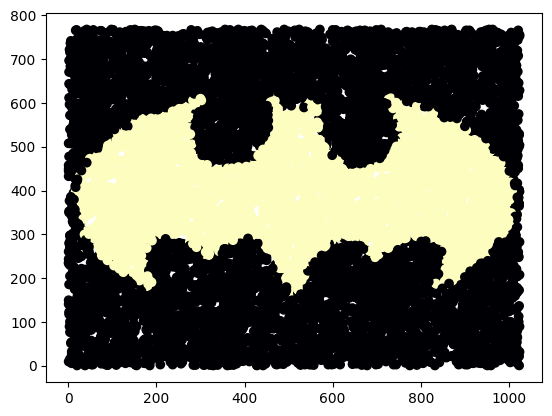

In [7]:
import matplotlib.pyplot as plt

plt.scatter(x = data['771'], y = data['421'], c=data['2'], cmap = 'magma')

In [17]:
# Verificando os valores de y

data['2'].value_counts()

2
1    6635
2    3364
Name: count, dtype: int64

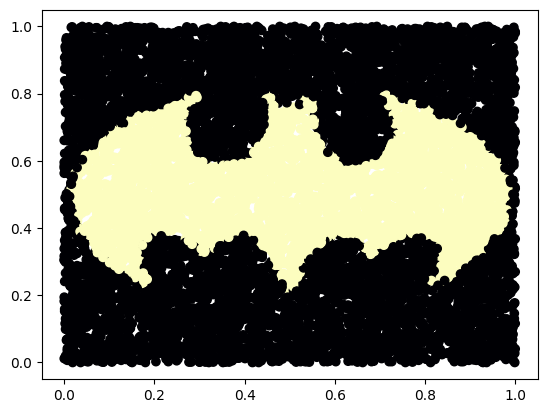

In [10]:
# Pré-processamento
#   Normalizando os dados

from sklearn.preprocessing import MinMaxScaler

normalizador = MinMaxScaler()
normalizador.fit(data)

dados_normalizados = pd.DataFrame(normalizador.transform(data), columns = data.columns)
dados_normalizados.head()

X = dados_normalizados.drop(columns='2')
y = dados_normalizados['2']



import matplotlib.pyplot as plt

plt.scatter(x = dados_normalizados['771'], y = dados_normalizados['421'], c=dados_normalizados['2'], cmap = 'magma')

In [19]:
# Separando os dados para o treinamento

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
# Para mostrar as metricas

def metricas(matriz_confusao):
    VP, FN = matriz_confusao[0]
    FP, VN = matriz_confusao[1]
    sensibilidade = VP/(VP+FN)
    especificidade =VN/(FP+VN)
    acuracia = (VP + VN)/(VP+FN+FP+VN)
    return [sensibilidade, especificidade, acuracia]
    

### MLP 

In [24]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(100,100), max_iter=1000, solver='adam')
mlp.fit(X_train, y_train)
predi = mlp.predict(X_test)

/home/lapisco/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [25]:
# Matriz de confusão para calcular as métricas
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, predi)

array([[1302,   61],
       [  81,  556]])

In [26]:
metrics = metricas(confusion_matrix(y_test, predi))
print(f'SENSIBILIDADE: {metrics[0]}; ESPECIFICIDADE: {metrics[1]};  ACURÁCIA: {metrics[2]}')


SENSIBILIDADE: 0.9552457813646368; ESPECIFICIDADE: 0.8728414442700158;  ACURÁCIA: 0.929


### Naive Bayes

In [27]:
from sklearn.naive_bayes import GaussianNB

naiveBayesGaussian = GaussianNB()
naiveBayesGaussian.fit(X_train, y_train)
prediNB = naiveBayesGaussian.predict(X_test)

print(confusion_matrix(prediNB, y_test))

[[1325  258]
 [  38  379]]


In [28]:
metrics = metricas(confusion_matrix(prediNB, y_test))
print(f'SENSIBILIDADE: {metrics[0]}; ESPECIFICIDADE: {metrics[1]};  ACURÁCIA: {metrics[2]}')

SENSIBILIDADE: 0.8370183196462413; ESPECIFICIDADE: 0.9088729016786571;  ACURÁCIA: 0.852


### SVM RBF

In [29]:
from sklearn.svm import SVC

svc = SVC(kernel='rbf',C=5, gamma=0.1)

svc.fit(X_train, y_train)
prediSVC = svc.predict(X_test)

print(confusion_matrix(prediSVC, y_test))

[[1139   61]
 [ 224  576]]


In [30]:
metrics = metricas(confusion_matrix(prediSVC, y_test))
print(f'SENSIBILIDADE: {metrics[0]}; ESPECIFICIDADE: {metrics[1]};  ACURÁCIA: {metrics[2]}')

SENSIBILIDADE: 0.9491666666666667; ESPECIFICIDADE: 0.72;  ACURÁCIA: 0.8575


### SVM Polinomial

In [76]:
from sklearn.svm import SVC

svc_pol = SVC(kernel='poly', C=5, gamma=2, degree=4)


svc_pol.fit(X_train, y_train)
prediSVC_poli = svc_pol.predict(X_test)

print(confusion_matrix(prediSVC_poli, y_test))


[[1292  453]
 [  71  184]]


In [77]:
metrics = metricas(confusion_matrix(prediSVC_poli, y_test))
print(f'SENSIBILIDADE: {metrics[0]}; ESPECIFICIDADE: {metrics[1]};  ACURÁCIA: {metrics[2]}')

SENSIBILIDADE: 0.7404011461318052; ESPECIFICIDADE: 0.7215686274509804;  ACURÁCIA: 0.738


### SVM Linear

In [99]:
from sklearn.svm import SVC

svc_lin = SVC(kernel='linear', C=9, gamma=5, degree=4)


svc_lin.fit(X_train, y_train)
prediSVC_lin = svc_lin.predict(X_test)

print(confusion_matrix(prediSVC_lin, y_test))


[[1363  637]
 [   0    0]]


In [100]:
metrics = metricas(confusion_matrix(prediSVC_lin, y_test))
print(f'SENSIBILIDADE: {metrics[0]}; ESPECIFICIDADE: {metrics[1]};  ACURÁCIA: {metrics[2]}')

SENSIBILIDADE: 0.6815; ESPECIFICIDADE: nan;  ACURÁCIA: 0.6815


/tmp/ipykernel_6707/662972416.py:7: RuntimeWarning: invalid value encountered in scalar divide
  especificidade =VN/(FP+VN)
